<a href="https://colab.research.google.com/github/Bala-Subramanian-G/Twitter-sentimental-analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initial work

In [3]:
#!pip install kaggle

Need to upload a json file from Kaggle

In [4]:
from google.colab import files

# Upload the kaggle.json file you downloaded
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [5]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d kazanova/sentiment140
!unzip sentiment140.zip

 91% 74.0M/80.9M [00:00<00:00, 177MB/s]
100% 80.9M/80.9M [00:00<00:00, 185MB/s]
Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


## Importing data and understanding it

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin', header=None)
df.head(5)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Renaming the column

In [9]:
df.columns

Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [10]:
df.columns = ['review', 'userid', 'date', 'query', 'username', 'feedback']
df.head()

,review,userid,date,query,username,feedback
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [11]:
df['review'].unique()

array([0, 4])

Replacing 4 as 1.

In [12]:
# positive review is represented as 4, so we are changing it as 1

df['review'].replace({4:1},inplace=True)

In [13]:
df['review'].value_counts()  # checking whether it is the balanced dataset

review
0    800000
1    800000
Name: count, dtype: int64

Here we do sentimental analysis, so only 'feedback' and 'review' columns are needed

In [14]:
df = df[['feedback','review']]
df

,feedback,review
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1599995,Just woke up. Having no school is the best fee...,1
1599996,TheWDB.com - Very cool to hear old Walt interv...,1
1599997,Are you ready for your MoJo Makeover? Ask me f...,1
1599998,Happy 38th Birthday to my boo of alll time!!! ...,1


In [15]:
# # Another way to do it
# df.loc[:,['feedback','review']]

## Trying the Text-cleaning on sample text


In [16]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
df['feedback'][0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [18]:
# [^A-Za-z0-9]       #-- only taking the alpha numeric value

In [19]:
text = "@switchfoot #Business http://twitpic.com/2y1zl - Awww, that's a bummer. www.google.com,  balaa@gmail.com,  hr@softetsolution.in. You shoulda got goood Caaar of Third Day to do it. ;D"
print(text,end='\n\n')
text = re.sub("https?:\S+|http?:\S|www.\S+"," ",text).lower() # For removing the words that starts with http or www
print(text,end='\n\n')
text = re.sub(r'\S+\.com\b|\S+\.in\b', '', text)  # For removing the words that ends with .com or .in
print(text,end='\n\n')
text = re.sub("@\S+|#\S+|[^A-Za-z0-9]+"," ",text).strip()   # For removing the words that starts '@'
                                                       # and removing everything apart from alphanumeric, and unwanted space
print(text,end='\n\n')
text = re.sub(r'(.)\1{2,}', r'\1\1', text)
text

@switchfoot #Business http://twitpic.com/2y1zl - Awww, that's a bummer. www.google.com,  balaa@gmail.com,  hr@softetsolution.in. You shoulda got goood Caaar of Third Day to do it. ;D

@switchfoot #business   - awww, that's a bummer.    balaa@gmail.com,  hr@softetsolution.in. you shoulda got goood caaar of third day to do it. ;d

@switchfoot #business   - awww, that's a bummer.    ,  . you shoulda got goood caaar of third day to do it. ;d

business awww that s a bummer you shoulda got goood caaar of third day to do it d



'business aww that s a bummer you shoulda got good caar of third day to do it d'

In [20]:
# converting the sentence into the list of words
cleaned_tweet = text.split()
print(cleaned_tweet)

['business', 'aww', 'that', 's', 'a', 'bummer', 'you', 'shoulda', 'got', 'good', 'caar', 'of', 'third', 'day', 'to', 'do', 'it', 'd']


#### **Stop Words**

Stopwords are the words that do not carry any significant meaning.

Examples:  "the", "a", "an", "is", "are", "to", etc

In [21]:
stop_words = stopwords.words('english')

In [22]:
print(stop_words)
len(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

179

In [23]:
# stopwords that are present in cleaned tweet
for word in cleaned_tweet:
  if word in stop_words:
    print(word)

that
s
a
you
of
to
do
it
d


In [24]:
# words in cleaned tweet, that are not stopwords
for word in cleaned_tweet:
  if word not in stop_words:
    print(word)

business
aww
bummer
shoulda
got
good
caar
third
day


In [25]:
# removing stopword from cleaned tweet
cleaned_tweet_copy = cleaned_tweet.copy()

for word in cleaned_tweet_copy:
  if word in stop_words:
    cleaned_tweet.remove(word)
cleaned_tweet

['business', 'aww', 'bummer', 'shoulda', 'got', 'good', 'caar', 'third', 'day']

#### **Stemming**

Stemming refers to the process of reducing words to their root or base form. The root form may not necessarily be a word itself, but it represents the core meaning of the word. It helps in reducing the dimensionality of text data by consolidating words with the same root, which can improve the performance of algorithms that rely on word frequency or similarity.



In [26]:
mystemmer = SnowballStemmer('english')

In [27]:
print(mystemmer.stem('criticise'))
print(mystemmer.stem('criticising'))
print(mystemmer.stem('criticism'))

criticis
criticis
critic


Applying stemming on cleaned_tweet using map function

In [28]:
cleaned_tweet = list(map(mystemmer.stem,cleaned_tweet))
cleaned_tweet

['busi', 'aww', 'bummer', 'shoulda', 'got', 'good', 'caar', 'third', 'day']

Finally, we are converting back the list of words into the sentence.

In [29]:
' '.join(cleaned_tweet)

'busi aww bummer shoulda got good caar third day'

## Creating the single function for entire Text-cleaning

In [30]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

def text_cleaning(text):
  # For removing the words that starts with 'http' or 'www'
  text = re.sub("https?:\S+|http?:\S|www.\S+"," ",text).lower()

  # For removing the words that ends with '.com' or '.in'
  text = re.sub(r'\S+\.com\b|\S+\.in\b', '', text)

  # For removing the character that is repeated more than 2 time in a word
  text = re.sub(r'(.)\1{2,}', r'\1\1', text)

  # For removing non-ASCII charactor (remove unidecode)
  text = re.sub('[^\x00-\x7F]+','',text)

  # For removing the words that starts '@' & '#'
  # and removing everything apart from alphanumeric, and unwanted space
  text = re.sub("@\S+|#\S+|[^A-Za-z0-9]+"," ",text).strip().split()

  # removing unnecessary words
  stop_words = stopwords.words('english')
  text_copy = text.copy()
  for word in text_copy:
    if word in stop_words:
      text.remove(word)

  # applying stemming
  mystemmer = SnowballStemmer('english')
  text = list(map(mystemmer.stem,text))

  return ' '.join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# first 10 feedback before text_cleaning
for i in df.feedback.head(10):
  print(i)

@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!
@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds
my whole body feels itchy and like its on fire 
@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. 
@Kwesidei not the whole crew 
Need a hug 
@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?
@Tatiana_K nope they didn't have it 
@twittera que me muera ? 


In [31]:
# first 10 feedback after text_cleaning
for i in df.feedback.head(10):
  print(text_cleaning(i))
  # print(i)

aww bummer shoulda got david carr third day
upset updat facebook text might cri result school today also blah
dive mani time ball manag save 50 rest go bound
whole bodi feel itchi like fire
behav mad see
whole crew
need hug
hey long time see yes rain bit bit lol fine thank
nope
que muera


## Applying Text-cleaning on the entire data

In [44]:
df['feedback'] = df['feedback'].apply(text_cleaning)

# It'll take some time. Took 8 mins for me

<ipython-input-44-53305f39c43c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['feedback'] = df['feedback'].apply(text_cleaning)


In [33]:
df.head()

,feedback,review
0,aww bummer shoulda got david carr third day,0
1,upset updat facebook text might cri result sch...,0
2,dive mani time ball manag save 50 rest go bound,0
3,whole bodi feel itchi like fire,0
4,behav mad see,0


There are some feedbacks which became empty-string **(' ')** after preprocessing. Since it is not nan value. So we can't extract them using **isnull()** method.

So we are going to extract them by applying condition.

In [45]:
# Extracting the boolean series for empty rows
condition = df.feedback.values==''

# Apply boolean indexing to filter rows
df[condition]

,feedback,review
13979,,0
37864,,0
67641,,0
68940,,0
92313,,0
...,...,...
1510677,,1
1519657,,1
1523690,,1
1533083,,1


See, there are totally 8113 rows with empty feedback. We are going to remove them by applying reverse boolean indexing.

In [35]:
df.shape

(1600000, 2)

In [36]:
# reverse boolean indexing

df = df[~condition]

In [37]:
df[df.feedback.values=='']

# Now, there is no empty value

,feedback,review


In [38]:
df.shape

(1591887, 2)

In [39]:
df.reset_index(drop=True, inplace=True)

In [40]:
df

,feedback,review
0,aww bummer shoulda got david carr third day,0
1,upset updat facebook text might cri result sch...,0
2,dive mani time ball manag save 50 rest go bound,0
3,whole bodi feel itchi like fire,0
4,behav mad see,0
...,...,...
1591882,woke school best feel ever,1
1591883,cool hear old walt interview,1
1591884,readi mojo makeov ask detail,1
1591885,happi 38th birthday boo time tupac amaru shakur,1


In [41]:
df2=df

## **Train and Test Splitting**

In [46]:
# df = df.sample(frac = 1, ignore_index=True).head(100000) # shuffle the dataset

In [47]:
df.review.value_counts()

review
0    796056
1    795831
Name: count, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df['feedback'], df['review'], test_size=0.2, random_state=42)

In [49]:
print("Training Size   :", train_x.shape)
print("Testing Size    :", test_x.shape)

Training Size   : (1273509,)
Testing Size    : (318378,)


In [50]:
train_y.value_counts()

review
0    637648
1    635861
Name: count, dtype: int64

In [51]:
test_y.value_counts()

review
1    159970
0    158408
Name: count, dtype: int64

It's confirmed that train & test dataframe are the balanced data.

## **Word-Index Dictionary creation**

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_x)

In [ ]:
word_index = tokenizer.word_index
total_words =len(word_index)
total_words

229136

In [ ]:
list(word_index.items())[:5]

[('go', 1), ('get', 2), ('day', 3), ('good', 4), ('work', 5)]

In [ ]:
tokenized_train_x = tokenizer.texts_to_sequences(train_x)
tokenized_test_x = tokenizer.texts_to_sequences(test_x)

In [ ]:
tokenized_train_x[:5]

[[575, 1048, 145, 41, 3],
 [7, 39],
 [40, 3, 40, 10, 425, 586, 32036, 1051, 5615, 81520],
 [17, 3878],
 [2150, 414, 133, 34, 3]]

## **Padding**  

To assign ideal value to max_length for padding, we have to find which feedback has more number of words. We have to assign that number of words to max_length.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_len = 50

In [ ]:
X_train_padded = pad_sequences(tokenized_train_x, value=-1, padding='post')

X_test_padded  = pad_sequences(tokenized_test_x, value=-1, padding='post')

In [ ]:
X_train_padded[0]

array([ 575, 1048,  145,   41,    3,   -1,   -1,   -1,   -1,   -1,   -1,
         -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,
         -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,
         -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,
         -1,   -1,   -1,   -1,   -1,   -1], dtype=int32)

In [ ]:
len(X_train_padded[4])

50

In [ ]:
len(X_test_padded[4])

30

## **Model**  

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, SimpleRNN, LSTM, GRU, Dense
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

In [ ]:
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=total_words, output_dim=128, input_length=max_len))
rnn_model.add(SimpleRNN(64, activation='tanh'))
rnn_model.add(Dense(units=1, activation='sigmoid'))
rnn_model.summary()

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

rnn_model.fit(X_train_padded, train_y, epochs=5, validation_split=0.2, batch_size=1024)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 128)           29329408  
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 29341825 (111.93 MB)
Trainable params: 29341825 (111.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
995/995 [==============================] - 88s 87ms/step - loss: 0.4894 - accuracy: 0.7652 - val_loss: 0.4680 - val_accuracy: 0.7780
Epoch 2/5
995/995 [==============================] - 61s 61ms/step - loss: 0.4222 - accuracy: 0.8048 - val_loss: 0.4726 - val_accur

In [ ]:
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim = total_words, output_dim = 30,input_length = max_len))
rnn_model.add(Dropout(0.6))
rnn_model.add(SimpleRNN(64,activation='tanh',dropout=0.5))

rnn_model.add(Dense(1,activation='sigmoid'))
rnn_model.summary()

rnn_model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

history = rnn_model.fit(X_train_padded,train_y, epochs = 10, validation_split=0.2, batch_size = 1024)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 30)            6874080   
                                                                 
 dropout (Dropout)           (None, 50, 30)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                6080      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 6880225 (26.25 MB)
Trainable params: 6880225 (26.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
995/995 [==============================] - 108s 104ms/step - loss: 0.5360 - accuracy: 0.7320 - val_loss: 0.4976 - val_accuracy: 0.7743
Ep

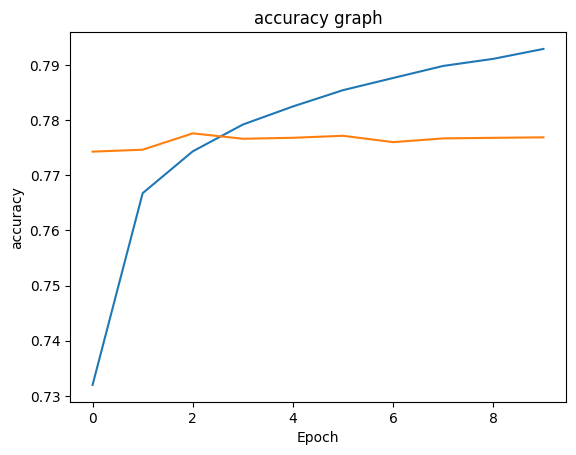

In [ ]:
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title('accuracy graph')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

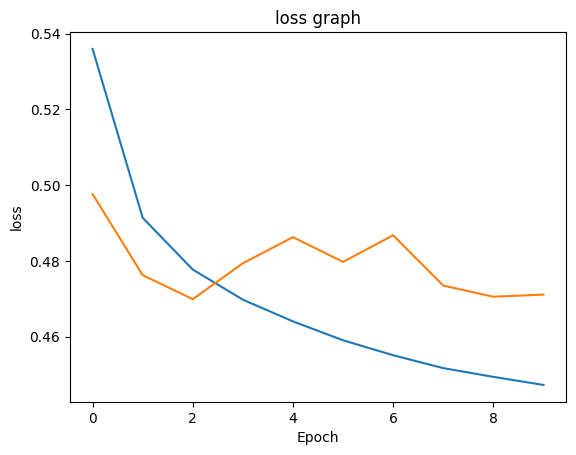

In [ ]:
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('loss graph')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
# Evaluation of train data

y_pred_train = rnn_model.predict(X_train_padded)

y_pred_train = np.where(y_pred_train<0.5,0,1)
cnf_matrix = confusion_matrix(train_y,y_pred_train)
print('confusion matrix:\n',cnf_matrix)

accuracy = accuracy_score(train_y,y_pred_train)
print('accuracy:',accuracy)

clf_report = classification_report(train_y,y_pred_train)
print(clf_report)

39798/39798 [==============================] - 241s 6ms/step
confusion matrix:
 [[558064  79584]
 [ 85998 549863]]
accuracy: 0.8699797174578272
              precision    recall  f1-score   support

           0       0.87      0.88      0.87    637648
           1       0.87      0.86      0.87    635861

    accuracy                           0.87   1273509
   macro avg       0.87      0.87      0.87   1273509
weighted avg       0.87      0.87      0.87   1273509



In [ ]:
# Evaluation of test data

y_pred = rnn_model.predict(X_test_padded)

y_pred = np.where(y_pred<0.5,0,1)
cnf_matrix = confusion_matrix(test_y,y_pred)
print('confusion matrix:\n',cnf_matrix)

accuracy = accuracy_score(test_y,y_pred)
print('accuracy:',accuracy)

clf_report = classification_report(test_y,y_pred)
print(clf_report)

9950/9950 [==============================] - 44s 4ms/step
confusion matrix:
 [[93574 64834]
 [90673 69297]]
accuracy: 0.5115648694319331
              precision    recall  f1-score   support

           0       0.51      0.59      0.55    158408
           1       0.52      0.43      0.47    159970

    accuracy                           0.51    318378
   macro avg       0.51      0.51      0.51    318378
weighted avg       0.51      0.51      0.51    318378



### LSTM model

In [ ]:
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=total_words, output_dim=128, input_shape=(max_len, )))
lstm_model.add(LSTM(64, activation='tanh'))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lstm_model.fit(X_train_padded, train_y, epochs=5, validation_split=0.2, batch_size=1024)

Epoch 1/5
995/995 [==============================] - 48s 46ms/step - loss: 0.5114 - accuracy: 0.7350 - val_loss: 0.4658 - val_accuracy: 0.7771
Epoch 2/5
995/995 [==============================] - 23s 23ms/step - loss: 0.4360 - accuracy: 0.7961 - val_loss: 0.4644 - val_accuracy: 0.7797
Epoch 3/5
995/995 [==============================] - 20s 20ms/step - loss: 0.4023 - accuracy: 0.8142 - val_loss: 0.4762 - val_accuracy: 0.7775
Epoch 4/5
995/995 [==============================] - 20s 20ms/step - loss: 0.3724 - accuracy: 0.8304 - val_loss: 0.5011 - val_accuracy: 0.7748
Epoch 5/5
995/995 [==============================] - 21s 21ms/step - loss: 0.3443 - accuracy: 0.8436 - val_loss: 0.5304 - val_accuracy: 0.7725


In [ ]:
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=total_words, output_dim=128, input_shape=(max_len, )))
lstm_model.add(Dropout(0.6))
lstm_model.add(LSTM(64,activation='tanh',dropout=0.6))
lstm_model.add(Dense(1,activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lstm_model.fit(X_train_padded, train_y, epochs=10, validation_split=0.2, batch_size=1024)

Epoch 1/10
995/995 [==============================] - 59s 57ms/step - loss: 0.5293 - accuracy: 0.7255 - val_loss: 0.4710 - val_accuracy: 0.7754
Epoch 2/10
995/995 [==============================] - 26s 26ms/step - loss: 0.4721 - accuracy: 0.7757 - val_loss: 0.4644 - val_accuracy: 0.7784
Epoch 3/10
995/995 [==============================] - 24s 24ms/step - loss: 0.4592 - accuracy: 0.7831 - val_loss: 0.4623 - val_accuracy: 0.7787
Epoch 4/10
995/995 [==============================] - 24s 24ms/step - loss: 0.4501 - accuracy: 0.7884 - val_loss: 0.4622 - val_accuracy: 0.7813
Epoch 5/10
995/995 [==============================] - 23s 24ms/step - loss: 0.4431 - accuracy: 0.7920 - val_loss: 0.4616 - val_accuracy: 0.7798
Epoch 6/10
995/995 [==============================] - 22s 22ms/step - loss: 0.4372 - accuracy: 0.7959 - val_loss: 0.4638 - val_accuracy: 0.7820
Epoch 7/10
995/995 [==============================] - 22s 23ms/step - loss: 0.4324 - accuracy: 0.7983 - val_loss: 0.4629 - val_accuracy:

### GRU model

In [ ]:
gru_model = Sequential()
gru_model.add(Embedding(input_dim=total_words, output_dim=100, input_shape=(max_len, )))
lstm_model.add(Dropout(0.6))
gru_model.add(GRU(64, activation='tanh',dropout=0.6))
gru_model.add(Dense(1, activation='sigmoid'))

gru_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

gru_model.fit(X_train_padded, train_y, epochs=5, validation_split=0.2, batch_size=1024)

Epoch 1/5
995/995 [==============================] - 64s 62ms/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6931 - val_accuracy: 0.4999
Epoch 2/5
995/995 [==============================] - 24s 24ms/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6931 - val_accuracy: 0.5001
Epoch 3/5
995/995 [==============================] - 20s 20ms/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6932 - val_accuracy: 0.4999
Epoch 4/5
995/995 [==============================] - 19s 19ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.4999
Epoch 5/5
995/995 [==============================] - 19s 20ms/step - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6931 - val_accuracy: 0.4999
